In [1]:
import pandas_datareader as pdr
key="04e28dcdeb6a4bda50c32027edfe644063f3241b"

In [2]:
df = pdr.get_data_tiingo('GOOGL',api_key=key)

In [3]:
df.to_csv('/content/drive/My Drive/Kaggle/Stoke_price_prediction/GOOGL.csv')

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('/content/drive/My Drive/Kaggle/Stoke_price_prediction/GOOGL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2015-10-05 00:00:00+00:00,671.68,673.0275,655.8700,661.60,1898012,671.68,673.0275,655.8700,661.60,1898012,0.0,1.0
1,GOOGL,2015-10-06 00:00:00+00:00,671.64,678.8000,663.0823,669.35,2157409,671.64,678.8000,663.0823,669.35,2157409,0.0,1.0
2,GOOGL,2015-10-07 00:00:00+00:00,670.00,678.7400,658.1100,677.40,2217672,670.00,678.7400,658.1100,677.40,2217672,0.0,1.0
3,GOOGL,2015-10-08 00:00:00+00:00,667.00,671.8900,654.4900,669.45,1965397,667.00,671.8900,654.4900,669.45,1965397,0.0,1.0
4,GOOGL,2015-10-09 00:00:00+00:00,671.24,674.0850,662.3600,667.49,1606178,671.24,674.0850,662.3600,667.49,1606178,0.0,1.0


In [6]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,GOOGL,2020-09-24 00:00:00+00:00,1422.86,1437.9900,1402.150,1402.680,1727611,1422.86,1437.9900,1402.150,1402.680,1727611,0.0,1.0
1253,GOOGL,2020-09-25 00:00:00+00:00,1439.06,1445.9400,1407.680,1425.050,1516677,1439.06,1445.9400,1407.680,1425.050,1516677,0.0,1.0
1254,GOOGL,2020-09-28 00:00:00+00:00,1458.66,1472.9900,1446.280,1471.990,1539236,1458.66,1472.9900,1446.280,1471.990,1539236,0.0,1.0
1255,GOOGL,2020-09-29 00:00:00+00:00,1466.02,1472.0000,1454.000,1463.910,1591112,1466.02,1472.0000,1454.000,1463.910,1591112,0.0,1.0
1256,GOOGL,2020-09-30 00:00:00+00:00,1465.60,1486.1975,1455.755,1460.935,2046170,1465.60,1486.1975,1455.755,1460.935,2046170,0.0,1.0


In [7]:
df1 = df.reset_index()['close']

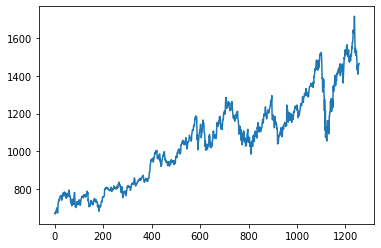

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
print(df1)

[[0.00445549]
 [0.00441741]
 [0.00285608]
 ...
 [0.75368197]
 [0.76068889]
 [0.76028904]]


In [11]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [12]:
training_size, test_size

(817, 440)

In [13]:
train_data.shape, test_data.shape

((817, 1), (440, 1))

In [14]:
len(df1)

1257

In [15]:
def create_dataset(dataset, time_step=1):
  datax, datay = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    datax.append(a)
    datay.append(dataset[i+time_step,0])
  return np.array(datax), np.array(datay)

In [16]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [17]:
print(x_train.shape, y_train.shape)

(716, 100) (716,)


In [18]:
print(x_test.shape), print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [19]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [21]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 114ms/step - loss: 0.0335 - val_loss: 0.0292
Epoch 2/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0049 - val_loss: 0.0056
Epoch 3/100
12/12 [==============================] - 0s 24ms/step - loss: 0.0028 - val_loss: 0.0122
Epoch 4/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0013 - val_loss: 0.0075
Epoch 5/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0012 - val_loss: 0.0049
Epoch 6/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0012 - val_loss: 0.0049
Epoch 7/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0011 - val_loss: 0.0060
Epoch 8/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0011 - val_loss: 0.0061
Epoch 9/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0011 - val_loss: 0.0053
Epoch 10/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0010 - val_loss: 0.005

In [25]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [26]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [27]:
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train, train_predict)))
print(math.sqrt(mean_squared_error(y_test, test_predict)))

956.3970147055499
1294.1873419654019


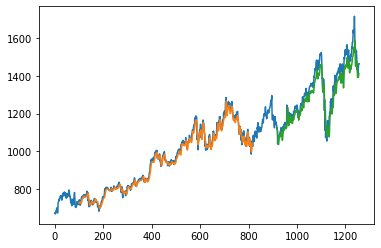

In [28]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [29]:
len(test_data)

440

In [30]:
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [31]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.7012538200097106,
 0.6742067232170909,
 0.6486447890783423,
 0.6567655823075237,
 0.6721884252515732,
 0.6837269966393434,
 0.6734641418901551,
 0.7065566123059054,
 0.7042622264111426,
 0.7104408838621844,
 0.7181808661544758,
 0.7171431563514504,
 0.7152010205733109,
 0.7297479983625129,
 0.7310332352745169,
 0.7381163187006731,
 0.7352031150334638,
 0.7114500328449432,
 0.7359361760869773,
 0.7435714353716237,
 0.7474176258342139,
 0.7594322108930968,
 0.6996448938013501,
 0.7101362351126724,
 0.717581088928874,
 0.7420767524443302,
 0.7478555584116374,
 0.730319214767848,
 0.7212939955635526,
 0.7460657470082542,
 0.7587467512066947,
 0.7289673359418883,
 0.7369643656165804,
 0.6621730976113634,
 0.6951418044726244,
 0.715020135378288,
 0.7378211902245831,
 0.764411313892935,
 0.7927055665038701,
 0.7834423404640182,
 0.7964660745056596,
 0.8108036062795724,
 0.8301773626938566,
 0.8046820704690639,
 0.8128980664324678,
 0.8091089976104114,
 0.8072430240196499,
 0.80908043679014

In [32]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print(lst_output)

[0.72286737]
101
1 day input [0.67420672 0.64864479 0.65676558 0.67218843 0.683727   0.67346414
 0.70655661 0.70426223 0.71044088 0.71818087 0.71714316 0.71520102
 0.729748   0.73103324 0.73811632 0.73520312 0.71145003 0.73593618
 0.74357144 0.74741763 0.75943221 0.69964489 0.71013624 0.71758109
 0.74207675 0.74785556 0.73031921 0.721294   0.74606575 0.75874675
 0.72896734 0.73696437 0.6621731  0.6951418  0.71502014 0.73782119
 0.76441131 0.79270557 0.78344234 0.79646607 0.81080361 0.83017736
 0.80468207 0.81289807 0.809109   0.80724302 0.80908044 0.8538162
 0.84627615 0.85477775 0.80898523 0.80085492 0.82105694 0.79651368
 0.81542094 0.82956807 0.78156685 0.77662582 0.76761965 0.77313188
 0.79775131 0.79148697 0.79001133 0.77451232 0.79993145 0.80889003
 0.79744666 0.8084997  0.84614286 0.83550872 0.86563086 0.86498348
 0.8741039  0.89381087 0.93025448 0.91539333 0.92577995 0.91635488
 0.94067918 1.         0.91633584 0.87035292 0.81550662 0.83800303
 0.81783909 0.80804273 0.80144518 

In [33]:
len(df1)

1257

In [34]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

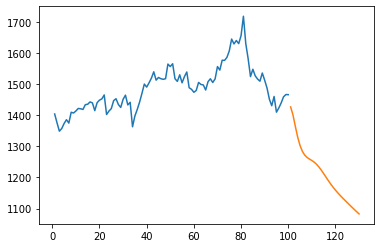

In [35]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

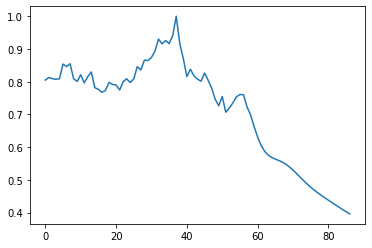

In [36]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [37]:
df3=scaler.inverse_transform(df3).tolist()

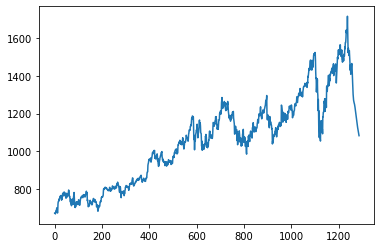

In [38]:
plt.plot(df3)